In [1]:
import pandas as pd


Cargamos los archivos json

In [3]:
df = pd.read_json('Google Maps/reviews-estados/review-Texas/1.json', lines=True)
df2 = pd.read_json('Google Maps/reviews-estados/review-Texas/2.json', lines=True)
df3 = pd.read_json('Google Maps/reviews-estados/review-Texas/3.json', lines=True)
df4 = pd.read_json('Google Maps/reviews-estados/review-Texas/4.json', lines=True)
df5 = pd.read_json('Google Maps/reviews-estados/review-Texas/5.json', lines=True)
df6 = pd.read_json('Google Maps/reviews-estados/review-Texas/6.json', lines=True)
df7 = pd.read_json('Google Maps/reviews-estados/review-Texas/7.json', lines=True)
df8 = pd.read_json('Google Maps/reviews-estados/review-Texas/8.json', lines=True)
df9 = pd.read_json('Google Maps/reviews-estados/review-Texas/9.json', lines=True)
df10 = pd.read_json('Google Maps/reviews-estados/review-Texas/10.json', lines=True)
df11 = pd.read_json('Google Maps/reviews-estados/review-Texas/11.json', lines=True)
df12 = pd.read_json('Google Maps/reviews-estados/review-Texas/12.json', lines=True)
df13 = pd.read_json('Google Maps/reviews-estados/review-Texas/13.json', lines=True)
df14 = pd.read_json('Google Maps/reviews-estados/review-Texas/14.json', lines=True)
df15 = pd.read_json('Google Maps/reviews-estados/review-Texas/15.json', lines=True)
df16 = pd.read_json('Google Maps/reviews-estados/review-Texas/16.json', lines=True)


Concatenamos los dataframes

In [4]:
dfc=pd.concat([df,df2,df3,df4,df5,df6,df7,df8,df9,df10,df11,df12,df13,df14,df15,df16], axis=0,join='inner')

In [5]:
#leemos el archivos del metadata1
metadata1= pd.read_parquet('Google Maps/metadata-sitios/metadata1.parquet')


In [6]:
#Realizamos una combinación entre los dataframes
TX1 = pd.merge(dfc, metadata1, on='gmap_id')

In [7]:
TX1.to_parquet('TX1.parquet', index=False)

In [8]:
#Liberamos memoria:
del TX1, metadata1, df,df2,df3,df4,df5,df6,df7,df8,df9,df10,df11,df12,df13,df14,df15,df16

In [9]:

#Cargamos la información del metadata2
metadata2= pd.read_parquet('Google Maps/metadata-sitios/metadata2.parquet')

In [10]:
#Realizamos una combinación entre los dataframes
TX2 = pd.merge(dfc, metadata2, on='gmap_id')

In [11]:
TX2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1641628 entries, 0 to 1641627
Data columns (total 22 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   user_id           1641628 non-null  float64
 1   name_x            1641628 non-null  object 
 2   time              1641628 non-null  int64  
 3   rating            1641628 non-null  int64  
 4   text              973496 non-null   object 
 5   pics              48320 non-null    object 
 6   resp              255256 non-null   object 
 7   gmap_id           1641628 non-null  object 
 8   name_y            1641628 non-null  object 
 9   address           1633206 non-null  object 
 10  description       640466 non-null   object 
 11  latitude          1641628 non-null  float64
 12  longitude         1641628 non-null  float64
 13  category          1640872 non-null  object 
 14  avg_rating        1641628 non-null  float64
 15  num_of_reviews    1641628 non-null  int64  
 16  

In [12]:
TX2.to_parquet('TX2.parquet', index=False)

In [13]:
#Liberamos memoria
del TX2, metadata2

In [14]:
#leemos los archivos del metadata3
metadata3= pd.read_parquet('Google Maps/metadata-sitios/metadata3.parquet')

In [15]:
#Realizamos una combinación entre los dataframes
TX3 = pd.merge(dfc, metadata3, on='gmap_id')

In [16]:
TX3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 0 entries
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   user_id           0 non-null      float64
 1   name_x            0 non-null      object 
 2   time              0 non-null      int64  
 3   rating            0 non-null      int64  
 4   text              0 non-null      object 
 5   pics              0 non-null      object 
 6   resp              0 non-null      object 
 7   gmap_id           0 non-null      object 
 8   name_y            0 non-null      object 
 9   address           0 non-null      object 
 10  description       0 non-null      object 
 11  latitude          0 non-null      float64
 12  longitude         0 non-null      float64
 13  category          0 non-null      object 
 14  avg_rating        0 non-null      float64
 15  num_of_reviews    0 non-null      int64  
 16  price             0 non-null      object 
 17  hours    

In [17]:
TX1 = pd.read_parquet('TX1.parquet')
TX2 = pd.read_parquet('TX2.parquet')


In [18]:
del TX3, metadata3

In [19]:
# Concatenamos los datasets resultantes:
df_tx=pd.concat([TX1,TX2], axis=0,join='inner')

Guardamos los datos finales de California: 

In [20]:
df_tx.to_parquet('df_tx.parquet', index=False)

In [21]:
#Liberamos memoria
del TX1, TX2

___________________________________________________________________________________________________________

## ETL

In [5]:
#Cargamos el dataset 
df_tx= pd.read_parquet('df_tx.parquet')

In [22]:
df_tx.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2278278 entries, 0 to 1641627
Data columns (total 22 columns):
 #   Column            Dtype  
---  ------            -----  
 0   user_id           float64
 1   name_x            object 
 2   time              int64  
 3   rating            int64  
 4   text              object 
 5   pics              object 
 6   resp              object 
 7   gmap_id           object 
 8   name_y            object 
 9   address           object 
 10  description       object 
 11  latitude          float64
 12  longitude         float64
 13  category          object 
 14  avg_rating        float64
 15  num_of_reviews    int64  
 16  price             object 
 17  hours             object 
 18  MISC              object 
 19  state             object 
 20  relative_results  object 
 21  url               object 
dtypes: float64(4), int64(3), object(15)
memory usage: 399.8+ MB


In [23]:
#Eliminamos las columnas que no se usarán en el análisis: pics', 'resp' y 'url' 

df_tx= df_tx.drop(['pics', 'resp', 'url'], axis=1)

In [24]:
null_counts = df_tx.isnull().sum()
print(null_counts)

user_id                   0
name_x                    0
time                      0
rating                    0
text                 906000
gmap_id                   0
name_y                    0
address               16132
description         1572067
latitude                  0
longitude                 0
category               1208
avg_rating                0
num_of_reviews            0
price               1573935
hours                196207
MISC                 158482
state                179892
relative_results      89626
dtype: int64


In [25]:
df_tx = df_tx.explode('category')
df_tx = df_tx.dropna(subset=['category'])

In [26]:
df_tx['price'].fillna('No Price', inplace=True)


In [27]:
df_tx['time'] = pd.to_datetime(df_tx['time'], unit='ms')

In [28]:
df_tx.head()

,user_id,name_x,time,rating,text,gmap_id,name_y,address,description,latitude,longitude,category,avg_rating,num_of_reviews,price,hours,MISC,state,relative_results
0,1.105453e+20,Kimberly Feger,2021-07-04 20:48:54.826,5,"The pharmacist, Erin, is phenomenal. She was s...",0x864c3998b8d8dc83:0x57ffabe1e2322320,Walmart Pharmacy,"Walmart Pharmacy, 12220 FM 423, Frisco, TX 75033",None,33.179867,-96.883691,Pharmacy,3.3,24,$,"[[Thursday, 9AM–9PM], [Friday, 9AM–9PM], [Satu...",{'Accessibility': ['Wheelchair accessible entr...,Open ⋅ Closes 9PM,"[0x864c3999b29e291f:0x2d364c05e88eec13, 0x864c..."
0,1.105453e+20,Kimberly Feger,2021-07-04 20:48:54.826,5,"The pharmacist, Erin, is phenomenal. She was s...",0x864c3998b8d8dc83:0x57ffabe1e2322320,Walmart Pharmacy,"Walmart Pharmacy, 12220 FM 423, Frisco, TX 75033",None,33.179867,-96.883691,Drug store,3.3,24,$,"[[Thursday, 9AM–9PM], [Friday, 9AM–9PM], [Satu...",{'Accessibility': ['Wheelchair accessible entr...,Open ⋅ Closes 9PM,"[0x864c3999b29e291f:0x2d364c05e88eec13, 0x864c..."
0,1.105453e+20,Kimberly Feger,2021-07-04 20:48:54.826,5,"The pharmacist, Erin, is phenomenal. She was s...",0x864c3998b8d8dc83:0x57ffabe1e2322320,Walmart Pharmacy,"Walmart Pharmacy, 12220 FM 423, Frisco, TX 75033",None,33.179867,-96.883691,Medical supply store,3.3,24,$,"[[Thursday, 9AM–9PM], [Friday, 9AM–9PM], [Satu...",{'Accessibility': ['Wheelchair accessible entr...,Open ⋅ Closes 9PM,"[0x864c3999b29e291f:0x2d364c05e88eec13, 0x864c..."
0,1.105453e+20,Kimberly Feger,2021-07-04 20:48:54.826,5,"The pharmacist, Erin, is phenomenal. She was s...",0x864c3998b8d8dc83:0x57ffabe1e2322320,Walmart Pharmacy,"Walmart Pharmacy, 12220 FM 423, Frisco, TX 75033",None,33.179867,-96.883691,Vitamin & supplements store,3.3,24,$,"[[Thursday, 9AM–9PM], [Friday, 9AM–9PM], [Satu...",{'Accessibility': ['Wheelchair accessible entr...,Open ⋅ Closes 9PM,"[0x864c3999b29e291f:0x2d364c05e88eec13, 0x864c..."
1,1.105453e+20,Kimberly Feger,2021-07-04 20:48:54.826,5,"The pharmacist, Erin, is phenomenal. She was s...",0x864c3998b8d8dc83:0x57ffabe1e2322320,Walmart Pharmacy,"Walmart Pharmacy, 12220 FM 423, Frisco, TX 75033",None,33.179867,-96.883691,Pharmacy,3.3,24,$,"[[Thursday, 9AM–9PM], [Friday, 9AM–9PM], [Satu...",{'Accessibility': ['Wheelchair accessible entr...,Open ⋅ Closes 9PM,"[0x864c3999b29e291f:0x2d364c05e88eec13, 0x864c..."


In [29]:
df_tx.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6562659 entries, 0 to 1641627
Data columns (total 19 columns):
 #   Column            Dtype         
---  ------            -----         
 0   user_id           float64       
 1   name_x            object        
 2   time              datetime64[ns]
 3   rating            int64         
 4   text              object        
 5   gmap_id           object        
 6   name_y            object        
 7   address           object        
 8   description       object        
 9   latitude          float64       
 10  longitude         float64       
 11  category          object        
 12  avg_rating        float64       
 13  num_of_reviews    int64         
 14  price             object        
 15  hours             object        
 16  MISC              object        
 17  state             object        
 18  relative_results  object        
dtypes: datetime64[ns](1), float64(4), int64(2), object(12)
memory usage: 1001.4+ MB


Realizamos un filtro de negocios relacionados con la hotelería, contenidos en la columna 'category'

In [35]:
#Creamos una lista con las palabras clave
keywords = ['Hotel', 'Hostel', 'Motel', 'Resort', 'Inn', 'Lodging', 'Lodge', 'Accommodation', 
            'Bed and Breakfast (B&B)', 'Guesthouse', 'Boutique Hotel', 'Vacation Rental', 
            'Homestay', 'Cabin', 'Suites', 'Spa Resort', 'Boutique Inn', 'Extended Stay', 
            'Boutique Accommodation', 'Retreat']


# Se realiza la busqueda de coincidencias exactas de las palabras clave
import re
pattern = r'\b(?:' + '|'.join(re.escape(keyword) for keyword in keywords) + r')\b'


# Creamos un dataframe de hoteles unicamente
tx_hotels = df_tx[df_tx['category'].str.contains(pattern, case=False, na=False)]



In [31]:
tx_hotels.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9873 entries, 1488 to 1599372
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   user_id           9873 non-null   float64       
 1   name_x            9873 non-null   object        
 2   time              9873 non-null   datetime64[ns]
 3   rating            9873 non-null   int64         
 4   text              6056 non-null   object        
 5   gmap_id           9873 non-null   object        
 6   name_y            9873 non-null   object        
 7   address           9853 non-null   object        
 8   description       2961 non-null   object        
 9   latitude          9873 non-null   float64       
 10  longitude         9873 non-null   float64       
 11  category          9873 non-null   object        
 12  avg_rating        9873 non-null   float64       
 13  num_of_reviews    9873 non-null   int64         
 14  price             9873 

## EDA

In [32]:
import matplotlib.pyplot as plt

In [45]:
tx_hotels.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9873 entries, 1488 to 1599372
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   user_id           9873 non-null   float64       
 1   name_x            9873 non-null   object        
 2   time              9873 non-null   datetime64[ns]
 3   rating            9873 non-null   int64         
 4   text              6056 non-null   object        
 5   gmap_id           9873 non-null   object        
 6   name_y            9873 non-null   object        
 7   address           9853 non-null   object        
 8   description       2961 non-null   object        
 9   latitude          9873 non-null   float64       
 10  longitude         9873 non-null   float64       
 11  category          9873 non-null   object        
 12  avg_rating        9873 non-null   float64       
 13  num_of_reviews    9873 non-null   int64         
 14  price             9873 

In [37]:
tx_hotels.head()

,user_id,name_x,time,rating,text,gmap_id,name_y,address,description,latitude,longitude,category,avg_rating,num_of_reviews,price,hours,MISC,state,relative_results
1488,1.074846e+20,Paulette Green,2019-04-23 08:52:42.665,5,Wonderful people! Look forward to getting to k...,0x8636395522622a8b:0x73638992e1d8c645,Pine Tree Masonic Lodge,"Pine Tree Masonic Lodge, 2709 Pine Tree Rd, Lo...",None,32.534913,-94.808631,Lodge,4.3,8,No Price,None,None,None,"[0x86363885f8016657:0x7a7c429db9ca9422, 0x8636..."
1489,1.074846e+20,Paulette Green,2019-04-23 08:52:42.665,5,Wonderful people! Look forward to getting to k...,0x8636395522622a8b:0x73638992e1d8c645,Pine Tree Masonic Lodge,"Pine Tree Masonic Lodge, 2709 Pine Tree Rd, Lo...",None,32.534913,-94.808631,Lodge,4.3,8,No Price,None,None,None,"[0x86363885f8016657:0x7a7c429db9ca9422, 0x8636..."
1490,1.112976e+20,Misty Ryan,2019-12-02 03:43:52.124,4,For the more mature crowd,0x8636395522622a8b:0x73638992e1d8c645,Pine Tree Masonic Lodge,"Pine Tree Masonic Lodge, 2709 Pine Tree Rd, Lo...",None,32.534913,-94.808631,Lodge,4.3,8,No Price,None,None,None,"[0x86363885f8016657:0x7a7c429db9ca9422, 0x8636..."
1491,1.112976e+20,Misty Ryan,2019-12-02 03:43:52.124,4,For the more mature crowd,0x8636395522622a8b:0x73638992e1d8c645,Pine Tree Masonic Lodge,"Pine Tree Masonic Lodge, 2709 Pine Tree Rd, Lo...",None,32.534913,-94.808631,Lodge,4.3,8,No Price,None,None,None,"[0x86363885f8016657:0x7a7c429db9ca9422, 0x8636..."
1492,1.110295e+20,James Parker,2021-01-07 04:53:47.209,4,(Translated by Google) A O K\n\n(Original)\nA ...,0x8636395522622a8b:0x73638992e1d8c645,Pine Tree Masonic Lodge,"Pine Tree Masonic Lodge, 2709 Pine Tree Rd, Lo...",None,32.534913,-94.808631,Lodge,4.3,8,No Price,None,None,None,"[0x86363885f8016657:0x7a7c429db9ca9422, 0x8636..."


In [38]:
#top de los hoteles con mejores calificaciones
media_rating = tx_hotels.groupby('name_y')['rating'].mean()
top_15 = media_rating.sort_values(ascending=False).head(15)
print(top_15)

name_y
Sunflower Beach Resort and Residences                                   5.000000
King Country Lake Cabin Rental                                          5.000000
Texoma Destinations                                                     5.000000
Brown Estate of Lamar State College - Orange                            5.000000
Brazos House Retreat                                                    5.000000
The Pines Catholic Camp                                                 5.000000
Green Door Lofts                                                        5.000000
Red Barn Pet Ranch                                                      5.000000
Ethridge Farms B&B                                                      5.000000
Frios Gourmet Pops                                                      5.000000
Painted Pony Tea Room & Cafe ~ Musical Murder Mystery Dinner Theater    4.966667
Gray Lodge #329 Masonic Lodge                                           4.947368
The Winfield Inn     

### TOP 10 DE LOS HOTELES MÁS VISITADOS

In [39]:
conteo_gmap_id = tx_hotels['name_y'].value_counts()
top_10_gmap_id = conteo_gmap_id.nlargest(10)

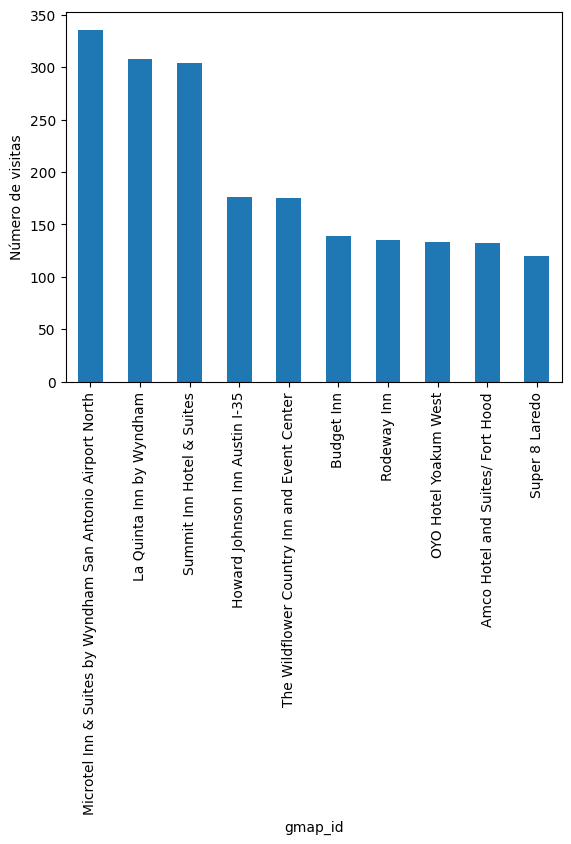

In [40]:
#Grafica de los hoteles mas visitados.
top_10_gmap_id.plot.bar()
plt.xlabel('gmap_id')
plt.ylabel('Número de visitas')
plt.show()

### TOP 10 DE LAS CATEGORÍAS DE HOTEL MÁS VISITADOS

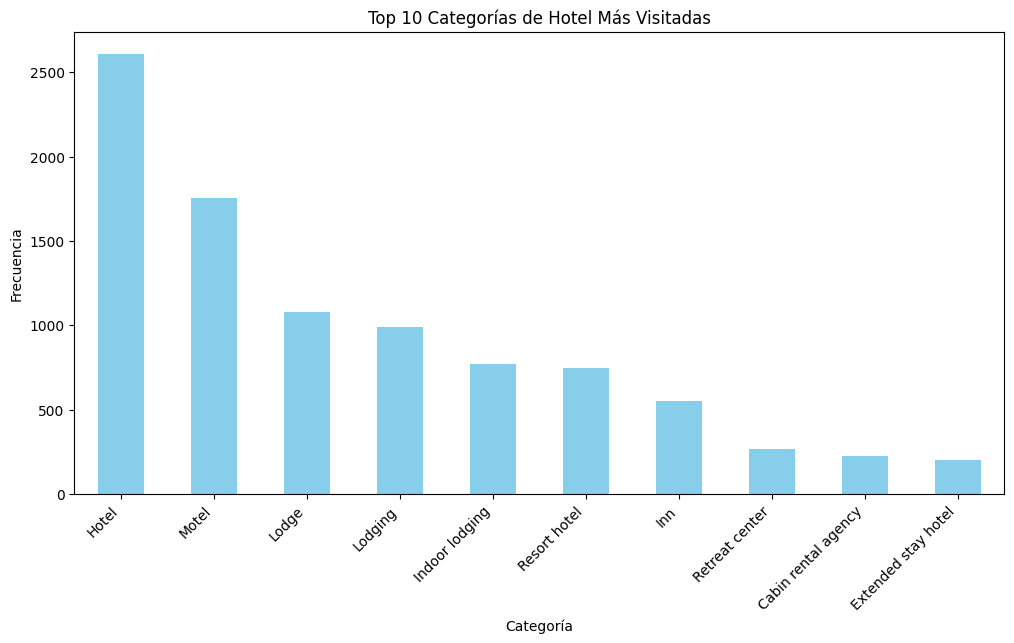

In [41]:
#Contamos la frecuencia de cada categoría contenida en el DataFrame filtrado
category_counts = tx_hotels['category'].value_counts()

# Seleccionamos las 10 categorías más frecuentes para graficarlos en el histograma
top_categories = category_counts.head(10)

# Se crear el histograma
plt.figure(figsize=(12, 6))
top_categories.plot(kind='bar', color='skyblue')
plt.title('Top 10 Categorías de Hotel Más Visitadas')
plt.xlabel('Categoría')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45, ha='right')
plt.show()

### HISTOGRAMA DE VISITAS DE CADA CATEGORÍA POR AÑO

<Figure size 1200x600 with 0 Axes>

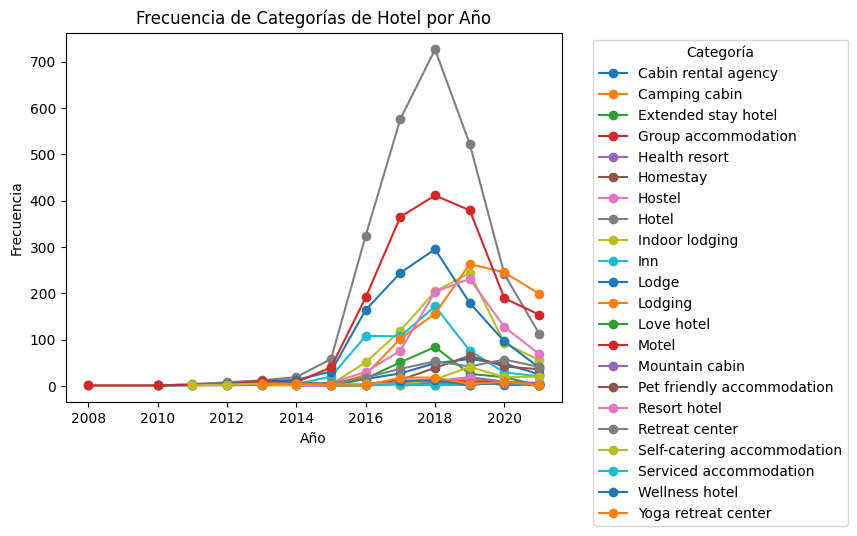

In [42]:


# Agruparmos por año y contar la frecuencia de cada categoría
grouped_by_year = tx_hotels.groupby([tx_hotels['time'].dt.year, 'category']).size().unstack()

# Crear el gráfico de líneas para cada categoría
plt.figure(figsize=(12, 6))
grouped_by_year.plot(marker='o')
plt.title('Frecuencia de Categorías de Hotel por Año')
plt.xlabel('Año')
plt.ylabel('Frecuencia')
plt.legend(title='Categoría', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

<Figure size 1200x600 with 0 Axes>

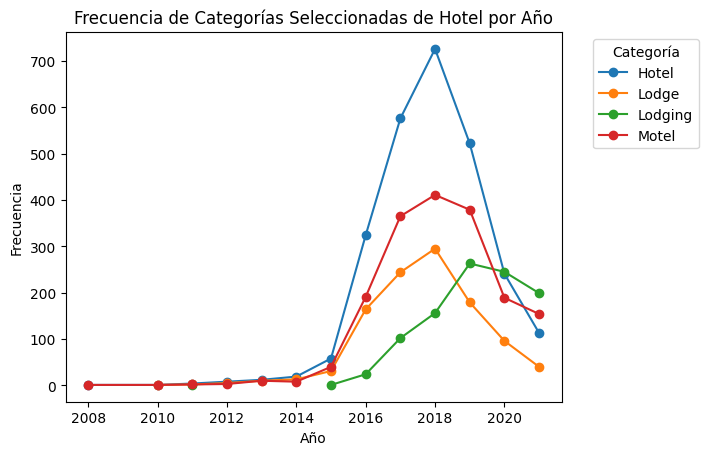

In [44]:
# Filtramos el DataFrame 
selected_categories = ['Ski resort', 'Hotel', 'Motel', 'Lodge', 'Lodging']
filtered_by_categories = tx_hotels[tx_hotels['category'].isin(selected_categories)]

# Agrupar por año y contar la frecuencia de cada categoría
grouped_by_year = filtered_by_categories.groupby([filtered_by_categories['time'].dt.year, 'category']).size().unstack()

# Crear el gráfico de líneas para cada categoría
plt.figure(figsize=(12, 6))
grouped_by_year.plot(marker='o')
plt.title('Frecuencia de Categorías Seleccionadas de Hotel por Año')
plt.xlabel('Año')
plt.ylabel('Frecuencia')
plt.legend(title='Categoría', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [26]:
import seaborn as sns

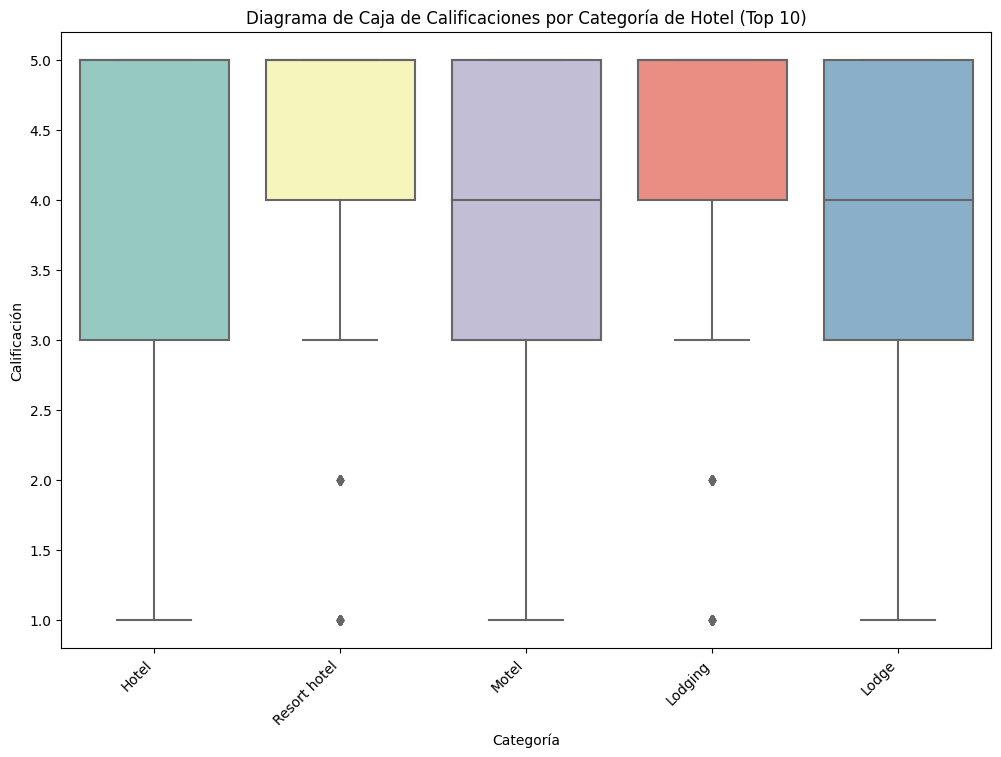

In [27]:
top_n = 5
top_categories = ny_hotels['category'].value_counts().head(top_n).index

# Filtra el DataFrame para incluir solo las top_n categorías
filtered_hotels = ny_hotels[ny_hotels['category'].isin(top_categories)]

# Crear un diagrama de caja para la columna 'rating' agrupada por la categoría
plt.figure(figsize=(12, 8))
sns.boxplot(x='category', y='rating', data=filtered_hotels, palette='Set3', order=top_categories)
plt.title('Diagrama de Caja de Calificaciones por Categoría de Hotel (Top 10)')
plt.xlabel('Categoría')
plt.ylabel('Calificación')
plt.xticks(rotation=45, ha='right')
plt.show()